# MFCC 이용한 남자곡에서 군집화
## 가수당 1곡을 보았을 떄

In [ ]:
import os
path = 'C:/Users/wnduq/Desktop/데이터/남자가수'
name = os.listdir(path)
import pandas as pd
import numpy as np
data = pd.read_csv('C:/Users/wnduq/Desktop/Python_code/voicepro/data_male.csv',encoding = 'euc-kr', index_col = 'Unnamed: 0')
data.index = name
data.shape

In [155]:
X = np.array(data)
X.shape
df = pd.DataFrame(X)
singers = name

In [156]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df)
scaled_X = scale.transform(df)

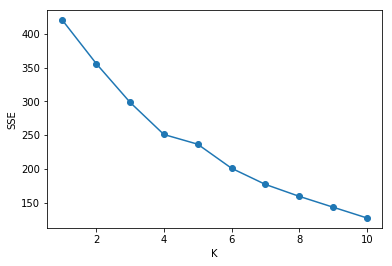

In [157]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.savefig('fig.png', dpi=300)
    plt.show()
    

elbow(scaled_X)

In [162]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 5
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(scaled_X)
predict = pd.DataFrame(model.predict(scaled_X))
predict.columns=['predict']

print(predict)
count=[]
for i in range(k):
    count.append(sum(predict['predict']==i))

string = 'abcdefghijklmnopqr'
    
for i in range(k):
    print('{}번째 군집은 {}개'.format(i+1,count[i]))
    predict['predict'] = predict['predict'].replace(i,string[i])

    predict
0         1
1         2
2         1
3         1
4         3
5         3
6         0
7         1
8         1
9         1
10        4
11        2
12        4
13        0
14        0
15        1
16        3
17        1
18        0
19        4
20        4
1번째 군집은 4개
2번째 군집은 8개
3번째 군집은 2개
4번째 군집은 3개
5번째 군집은 4개


           pc1        pc2 singer cluster
0    -0.190486    1.44107   10cm       b
1      1.50447    3.46979    김동률       c
2      1.39043    1.43742    김범수       b
3    -0.264466  -0.441213     김필       b
4     -2.90665   -3.07991     나얼       d
5     -2.04411   -1.52288    박효신       d
6      3.29091   -1.37281    성시경       a
7      1.43671    1.04924     이수       b
8     -1.32181  -0.790953    이승철       b
9    0.0678605   -1.00003    임창정       b
10     -3.1723  0.0282813   자이언티       e
11    0.236259    3.68177    잔나비       c
12    -1.61058   0.814549    장범준       e
13     1.51044  -0.633634    정승환       a
14     4.66704   -2.40729    정준일       a
15 -0.00610826   -1.75322    케이윌       b
16    -2.35038  -0.697789    크러쉬       d
17    0.341535    2.22759     폴킴       b
18     2.90736   -1.59412     허각       a
19    -1.84415    1.32525     혁오       e
20    -1.64196  -0.181099    황치열       e


,pc1,pc2,singer,cluster
0,-0.190486,1.44107,10cm,b
2,1.39043,1.43742,김범수,b
3,-0.264466,-0.441213,김필,b
7,1.43671,1.04924,이수,b
8,-1.32181,-0.790953,이승철,b
9,0.0678605,-1.00003,임창정,b
15,-0.00610826,-1.75322,케이윌,b
17,0.341535,2.22759,폴킴,b


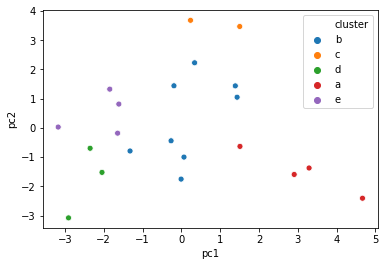

In [179]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(scaled_X)
new = np.c_[pc,singers, predict]
df  = pd.DataFrame(new,columns=['pc1','pc2','singer','cluster'])
print(df)

#polting
import seaborn as sns
sns.scatterplot(x='pc1',y='pc2',hue = 'cluster',data =df)
df[df['cluster']=='a']

pc1이 크다 -> 1p + 2p
pc1이 작다 -> 3p가 크다
pc1이 중간이다 -> 2p가 크다.
그룹'e' -> 보컬이 제대로 안잡힘... -> 낮음 배음을 반주 취급하고 지워서 그런듯...
pc2이 크다 -> 잡음이 크다

피쳐링곡 모두 없애고, 세곡으로 평균 매겨서 하면 어느정도 괜찮을듯. 

## 가수당 3곡씩 평균내서 확인

In [29]:
import pandas as pd
import numpy as np
data = pd.read_csv('C:/Users/wnduq/Desktop/Python_code/voicepro/data_male_full_30sec.csv',encoding = 'euc-kr', index_col = 'Unnamed: 0')

In [30]:
data = pd.pivot_table(data, index = '0.1')
singers = data.index

In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(data)
scaled_X = scale.transform(data)

In [32]:
tmp = pd.DataFrame(scaled_X)
tmp2 = pd.DataFrame(singers)
mean_db = pd.concat([tmp2,tmp],axis=1)
mean_db.to_csv('./mean_db.csv')

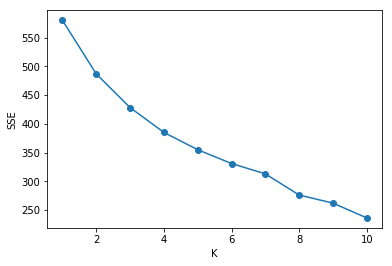

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.savefig('fig.png', dpi=300)
    plt.show()
    

elbow(scaled_X)

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 3
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(scaled_X)
predict = pd.DataFrame(model.predict(scaled_X))
predict.columns=['predict']

count=[]
for i in range(k):
    count.append(sum(predict['predict']==i))

string = 'abcdefghijklmnopqr'
    
for i in range(k):
    print('{}번째 군집은 {}개'.format(i+1,count[i]))
    predict['predict'] = predict['predict'].replace(i,string[i])

1번째 군집은 11개
2번째 군집은 9개
3번째 군집은 9개


          pc1         pc2 singer cluster
0    0.307857   0.0198834   10cm       c
1     1.50723    -1.12834    김동률       c
2     2.03546     2.13865    김범수       b
3   -0.826213     1.02852    김연우       b
4  -0.0223385     2.52468     김필       b
5   -0.198138    -2.26605     나얼       a
6   0.0359268    -1.19129      딘       a
7     3.65907    -1.08354    로이킴       c
8   -0.583023     3.01163   멜로망스       b
9    -3.60608   -0.203947    민경훈       a
10  -0.257517     3.32762    박효신       b
11    3.33264     1.14372    성시경       c
12  -0.214071     1.43725    양다일       b
13   -2.37279   -0.182465     오혁       a
14   -1.21766    -1.14457    윤도현       a
15    1.07227    -1.16755     이수       c
16   0.627651    -0.16682    이승철       c
17    -2.7538     -1.7695    임창정       a
18     2.1456    -2.47436   자이언티       c
19   0.716296   -0.152674    잔나비       a
20  -0.516661     -2.6281    장범준       a
21    1.43857     2.31654    정승환       b
22     4.9016  -0.0404789    정준일       c
23   0.154843   

,pc1,pc2,singer,cluster
5,-0.198138,-2.26605,나얼,a
6,0.0359268,-1.19129,딘,a
9,-3.60608,-0.203947,민경훈,a
13,-2.37279,-0.182465,오혁,a
14,-1.21766,-1.14457,윤도현,a
17,-2.7538,-1.7695,임창정,a
19,0.716296,-0.152674,잔나비,a
20,-0.516661,-2.6281,장범준,a
24,-2.15881,0.00958012,크러쉬,a
26,-3.35919,-3.25513,하현우,a


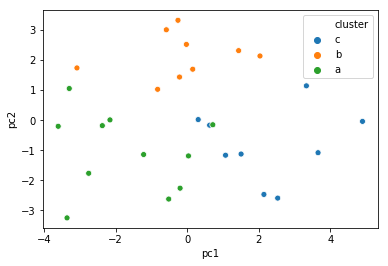

In [19]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(scaled_X)
new = np.c_[pc,singers, predict]
df  = pd.DataFrame(new,columns=['pc1','pc2','singer','cluster'])
print(df)

#polting
import seaborn as sns
sns.scatterplot(x='pc1',y='pc2',hue = 'cluster',data =df)
df[df['cluster']=='a']

완전히 기대하지 않은 결과다...
1) 클러스터링이 안돼는 것
2) 데이터가 제대로 안되서
3) 집계를 하면서 생긴 오류
4) 20차원상에서 Euclidean dist가 군집화에 적절하지 않을 수 있다.
4)의 경우를 고려하여 manifold learning을 하여 준다.

# manifold learning 이후, 축소된 차원에서 군집화를 한다면?

## scaling과 가수당 3곡을 평균

In [1]:
import os
path = 'C:/Users/wnduq/Desktop/데이터/남자가수'
list_name = os.listdir(path)
list_name = list_name * 3
list_name.sort()
import pandas as pd
import numpy as np
data = pd.read_csv('C:/Users/wnduq/Desktop/Python_code/voicepro/data_male_.csv',encoding = 'euc-kr', index_col = 'Unnamed: 0')

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(data)
data = scale.transform(data)
data = pd.DataFrame(data)
name = pd.DataFrame(list_name)
name.index = data.index

data = pd.concat([data,name],axis = 1)
data.columns = [str(x) for x in range(21)]
data = pd.pivot_table(data, index = '20')
singers = data.index
data = np.array(data)

In [2]:
data.shape

(29, 20)

## 전체곡 평균

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('C:/Users/wnduq/Desktop/Python_code/voicepro/data_male_full.csv',encoding = 'euc-kr', index_col = 'Unnamed: 0')
list_name = data['0.1']
data = data.iloc[:,:20]

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(data)
data = scale.transform(data)
data = pd.DataFrame(data)
name = pd.DataFrame(list_name)
name.index = data.index

data = pd.concat([data,name],axis = 1)
data.columns = [str(x) for x in range(21)]
data = pd.pivot_table(data, index = '20')
singers = data.index
data = np.array(data)

In [4]:
data.shape

(29, 20)

## Stacked AutoEncorder를 통한 20에서 2차원으로 축소

In [5]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [78]:
import numpy as np
import tensorflow as tf
from functools import partial


################
# layer params #
################
n_inputs = 20
n_hidden1 = 10  # encoder
n_hidden2 = 2  # coding units
n_hidden3 = n_hidden1  # decoder
n_outputs = n_inputs  # reconstruction

################
# train params #
################
learning_rate = 0.01
l2_reg = 0.001
n_epochs = 1000
batch_size = 20
n_batches = len(data) // batch_size

# set the layers using partial
he_init = tf.keras.initializers.he_normal()  # He 초기화
l2_regularizer = tf.contrib.layers.l2_regularizer(scale=l2_reg)  # L2 규제
dense_layer = partial(tf.layers.dense,
                      activation=tf.nn.elu,
                      kernel_initializer=he_init,
                      kernel_regularizer=l2_regularizer)

# stacked autoencoder
inputs = tf.placeholder(tf.float32, shape=[None, n_inputs])

hidden1 = dense_layer(inputs, n_hidden1)
hidden2 = dense_layer(hidden1, n_hidden2)
hidden3 = dense_layer(hidden2, n_hidden3)
outputs = dense_layer(hidden3, n_outputs, activation=None)

# loss
reconstruction_loss = tf.reduce_mean(tf.square(outputs - inputs))
reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_losses)

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

# Train

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        for iteration in range(n_batches):
            X_batch, y_batch = next(shuffle_batch(data, data, batch_size))
            sess.run(train_op, feed_dict={inputs: X_batch})
        loss_train = reconstruction_loss.eval(feed_dict={inputs: X_batch})
        #loss_validatation = reconstruction_loss.eval(feed_dict={inputs: x_test})
        if (epoch+1) % 20 ==0:
            print('epoch : {}, Train MSE : {:.5f}'.format(epoch, loss_train))
    x_2dim = hidden2.eval(feed_dict={inputs: data})
    #saver = tf.train.Saver()
    #save_path = saver.save(sess, './encorder.ckpt')

epoch : 19, Train MSE : 0.31751
epoch : 39, Train MSE : 0.25336
epoch : 59, Train MSE : 0.22543
epoch : 79, Train MSE : 0.20578
epoch : 99, Train MSE : 0.19620
epoch : 119, Train MSE : 0.19085
epoch : 139, Train MSE : 0.18707
epoch : 159, Train MSE : 0.18410
epoch : 179, Train MSE : 0.18139
epoch : 199, Train MSE : 0.17853
epoch : 219, Train MSE : 0.17510
epoch : 239, Train MSE : 0.17056
epoch : 259, Train MSE : 0.16433
epoch : 279, Train MSE : 0.15651
epoch : 299, Train MSE : 0.14906
epoch : 319, Train MSE : 0.14373
epoch : 339, Train MSE : 0.14023
epoch : 359, Train MSE : 0.13776
epoch : 379, Train MSE : 0.13578
epoch : 399, Train MSE : 0.13405
epoch : 419, Train MSE : 0.13248
epoch : 439, Train MSE : 0.13101
epoch : 459, Train MSE : 0.12965
epoch : 479, Train MSE : 0.12838
epoch : 499, Train MSE : 0.12715
epoch : 519, Train MSE : 0.12591
epoch : 539, Train MSE : 0.12461
epoch : 559, Train MSE : 0.12324
epoch : 579, Train MSE : 0.12184
epoch : 599, Train MSE : 0.12045
epoch : 619, Tr

## AE를 통해 학습된 manifold통해 2차원 euclideandist 통한 k-means클러스터링

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 5
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(x_2dim)
predict = pd.DataFrame(model.predict(x_2dim))
predict.columns=['predict']

count=[]
for i in range(k):
    count.append(sum(predict['predict']==i))

string = 'abcdefghijklmnopqr'
    
for i in range(k):
    print('{}번째 군집은 {}개'.format(i+1,count[i]))
    predict['predict'] = predict['predict'].replace(i,string[i])

1번째 군집은 7개
2번째 군집은 4개
3번째 군집은 6개
4번째 군집은 9개
5번째 군집은 3개


## 결과 확인

          pc1       pc2 singer cluster
0     8.08318  0.848308   10cm       c
1    0.684337   5.81882    김동률       b
2     5.66411   1.84739    김범수       c
3   -0.714431   1.23354    김연우       d
4      5.4593 -0.125524     김필       c
5   -0.924282   3.68025     나얼       d
6   -0.833465   1.87286      딘       d
7     8.33296     4.915    로이킴       e
8    0.762684  0.927556   멜로망스       a
9   -0.912215 -0.905664    민경훈       a
10    4.21887   1.04293    박효신       c
11    7.37566   2.54028    성시경       e
12     2.5081  0.591887    양다일       a
13   0.562471 -0.712833     오혁       a
14  -0.942961   3.47798    윤도현       d
15 -0.0926263   2.17558     이수       d
16    6.98325 -0.808081    이승철       c
17  -0.953313   1.45125    임창정       d
18    2.63674    6.6777   자이언티       b
19  -0.636864   4.28314    잔나비       d
20  -0.913085   8.37078    장범준       b
21    6.24773  0.286292    정승환       c
22    10.1117   3.57146    정준일       e
23   0.138645   1.85842    케이윌       d
24  -0.862067  0.205836  

,pc1,pc2,singer,cluster
3,-0.714431,1.23354,김연우,d
5,-0.924282,3.68025,나얼,d
6,-0.833465,1.87286,딘,d
14,-0.942961,3.47798,윤도현,d
15,-0.0926263,2.17558,이수,d
17,-0.953313,1.45125,임창정,d
19,-0.636864,4.28314,잔나비,d
23,0.138645,1.85842,케이윌,d
26,-0.974817,4.77639,하현우,d


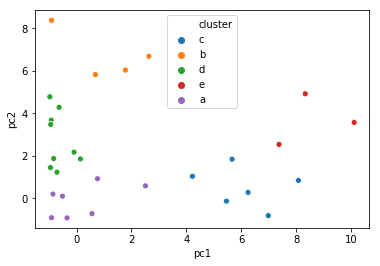

In [88]:
new = np.c_[x_2dim,singers, predict]
df  = pd.DataFrame(new,columns=['pc1','pc2','singer','cluster'])
print(df)

#polting
import seaborn as sns
sns.scatterplot(x='pc1',y='pc2',hue = 'cluster',data =df)
df[df['cluster']=='d']

비교적 원하는 결과에 가깝게 도출되었다.

# labeling을 위한 군집화 결과 저장하기

In [89]:
label = np.c_[singers, predict]
label = pd.DataFrame(label)
label.to_csv('C:/Users/wnduq/Desktop/label.csv',encoding = 'euc-kr')

# spectogram에서의 차이

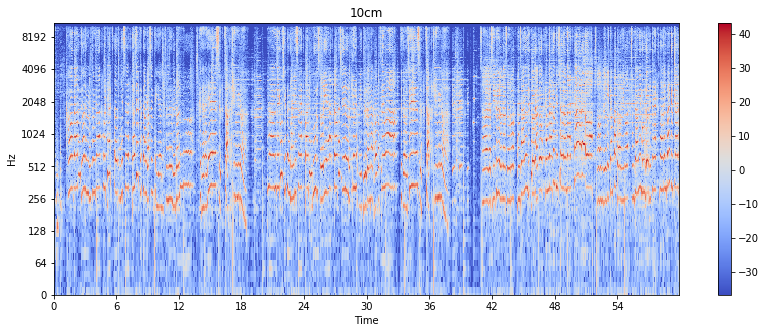

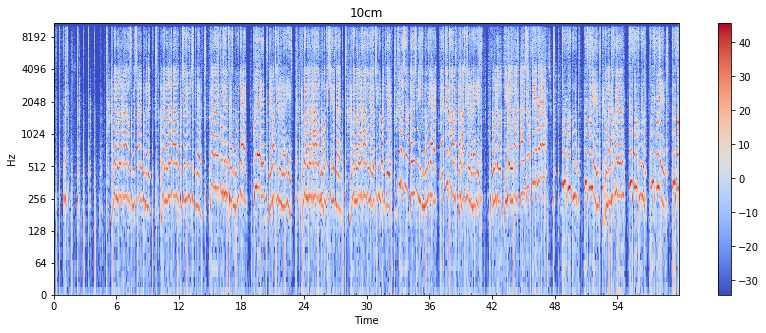

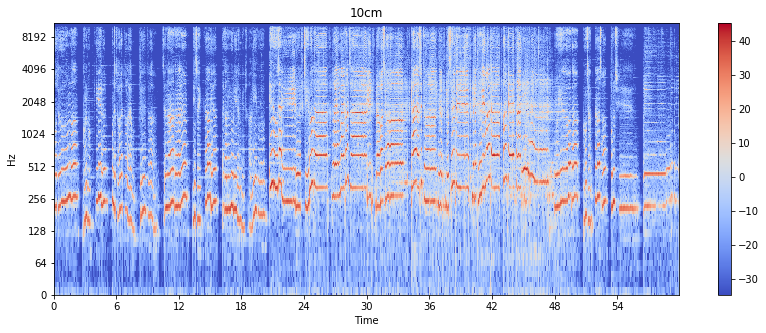

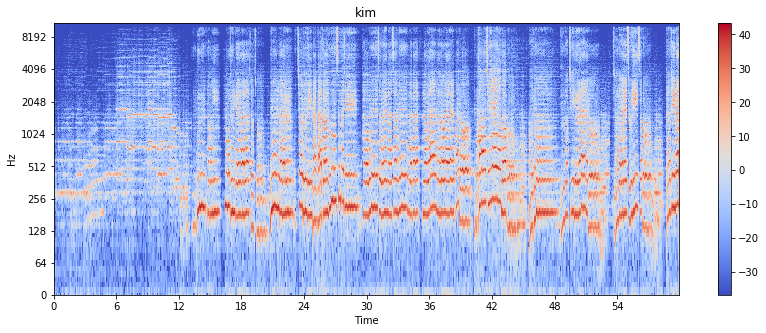

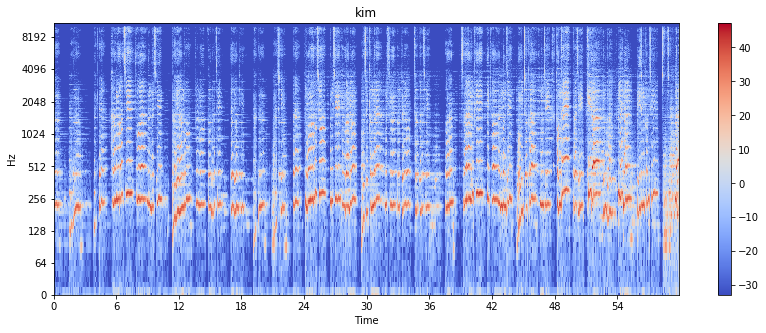

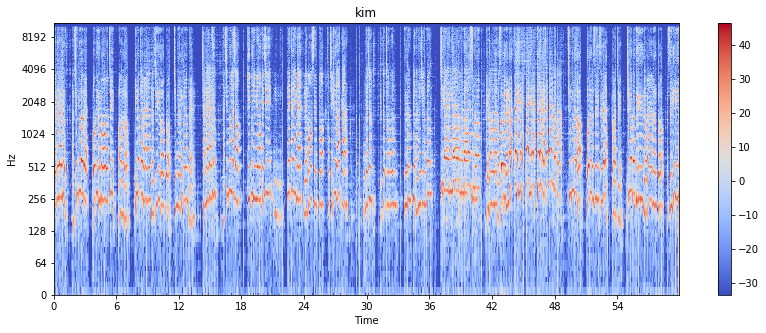

In [51]:
%matplotlib inline
import librosa
import matplotlib.pyplot as plt
import librosa.display

local_path='C:/Users/wnduq/Desktop/output_music/{}.wav_vocals_vad.wav'
vocal = ['01 Kingstar','02 우정 그 씁쓸함에 대하여','03 그게 아니고','01+시작','02+배려','03+내+오랜+친구들']
vocal_eng = ['10cm','10cm','10cm','kim','kim','kim']


for i in range(6):
    song = local_path.format(vocal[i])
    x , sr_x = librosa.load(song)
    x = x[:22000*60]
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14,5))
    plt.title(vocal_eng[i])
    librosa.display.specshow(Xdb,sr=sr_x,x_axis='time',y_axis='log')
    plt.colorbar()

충분히 차이가 들어나다.
디폴트 파라미터의 mfcc 써도 괜찮을 것 같다.